In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter

In [2]:
df=pd.read_csv("netflix_titles.csv")

In [3]:
df.shape

(6234, 12)

In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [6]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Change date format and extract year from date

In [22]:
df['date_added']=pd.to_datetime(df['date_added'])

df['year_added']=df['date_added'].dt.year

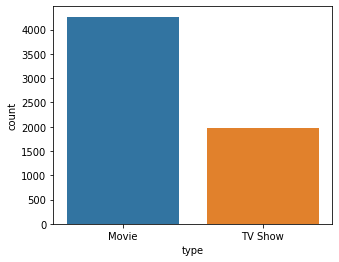

In [23]:
plt.figure(figsize=(5,4))
sns.countplot('type',data=df)

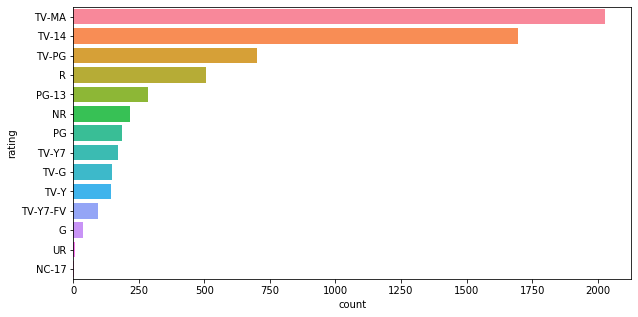

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,
                  y = 'rating',
                  saturation=1,
                 order=df['rating'].value_counts().index)

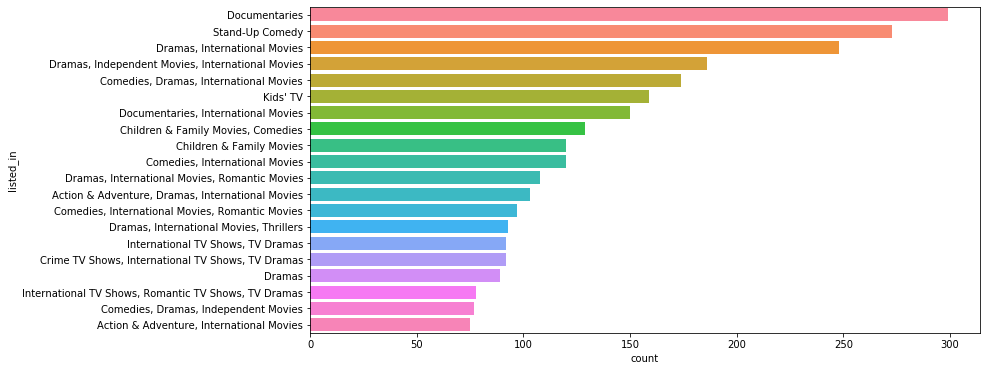

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
                  y = 'listed_in',
                  saturation=1,
                 order=df['listed_in'].value_counts().iloc[:20].index)

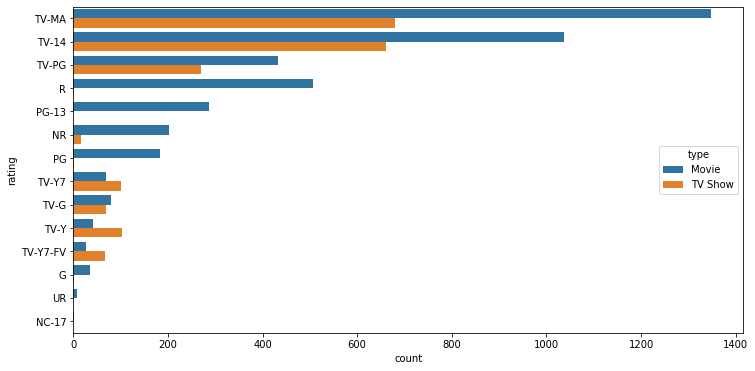

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
                  y = 'rating',
                  hue='type',
             order=df['rating'].value_counts().index)

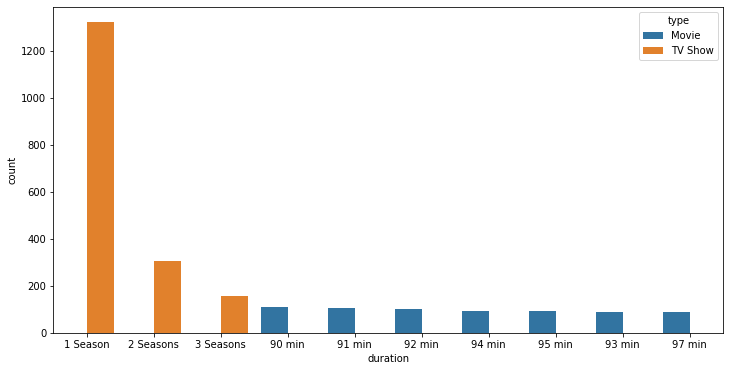

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
              x = 'duration',
              hue='type',
             order=df['duration'].value_counts().iloc[:10].index,
             orient='v')


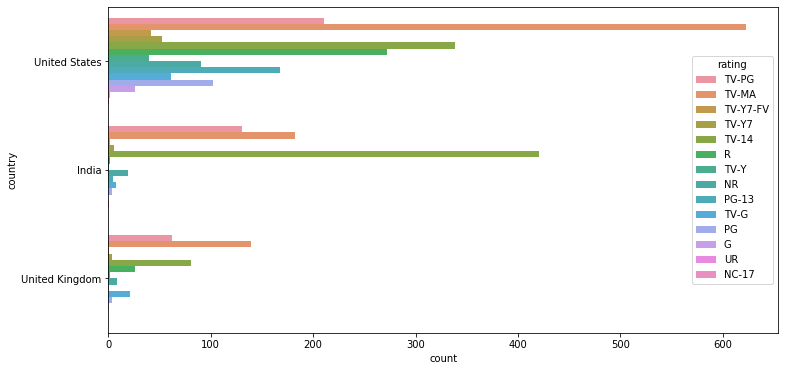

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
                  y = 'country',
                  hue='rating',
             order=df['country'].value_counts().iloc[:3].index)

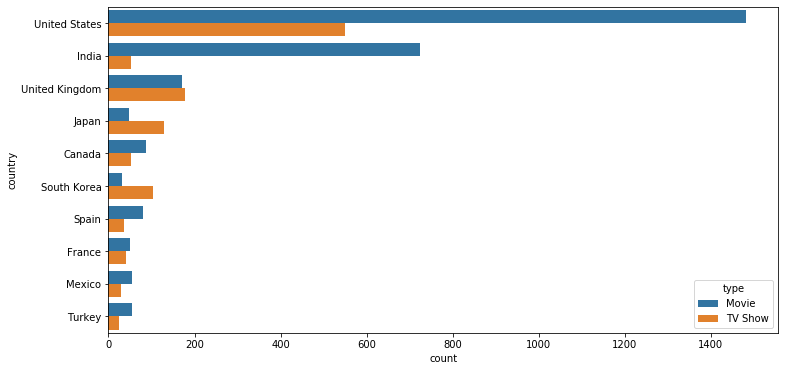

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
              y = 'country',
              hue='type',
             order=df['country'].value_counts().iloc[:10].index)


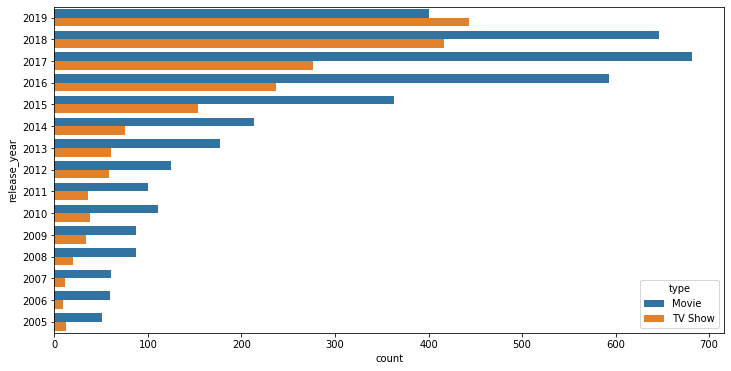

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
              y = 'release_year',
              hue='type',
             order=sorted(df['release_year'].unique(),reverse=True)[1:16])

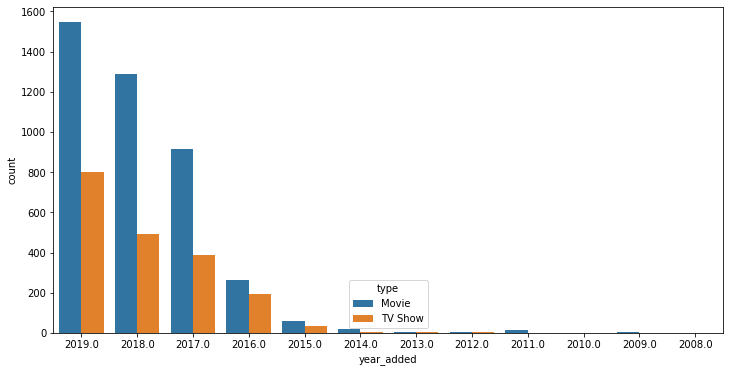

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,
              x = 'year_added',
              hue='type',
              order=sorted(df['year_added'].unique(),reverse=True)[1:13])

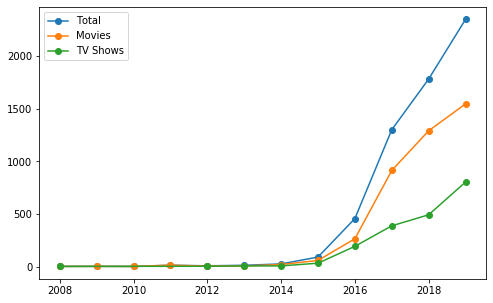

In [19]:
plt.figure(figsize=(8,5))

Total_x=list(df['year_added'].value_counts().sort_index().index.astype(int))[:-1]
Total_y=list(df['year_added'].value_counts().sort_index().values)[:-1]

movies_x=list(df[df['type']=='Movie']['year_added'].value_counts().sort_index().index.astype(int))[:-1]
movies_y=list(df[df['type']=='Movie']['year_added'].value_counts().sort_index().values)[:-1]

shows_x=list(df[df['type']=='TV Show']['year_added'].value_counts().sort_index().index.astype(int))[:-1]
shows_y=list(df[df['type']=='TV Show']['year_added'].value_counts().sort_index().values)[:-1]


plt.plot( Total_x,Total_y , linestyle='-', marker='o',label='Total')
plt.plot( movies_x,movies_y , linestyle='-', marker='o',label='Movies')
plt.plot( shows_x,shows_y , linestyle='-', marker='o',label='TV Shows')
plt.legend(loc="upper left")

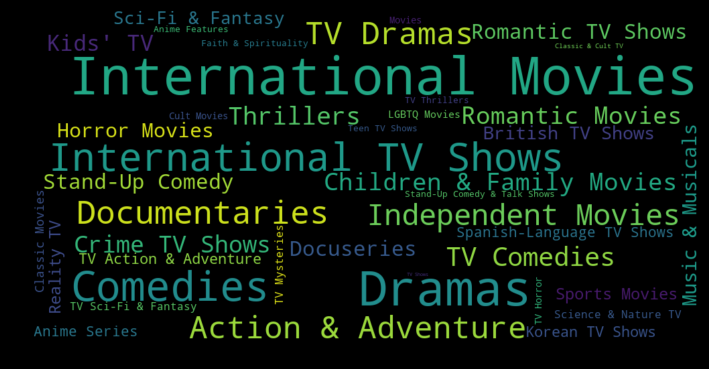

In [20]:
categories = ", ".join(df['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
categories_frequncy=dict(counter_list)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(df['listed_in']))
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate_from_frequencies(categories_frequncy)

fig = plt.figure(
    figsize = (12, 12),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

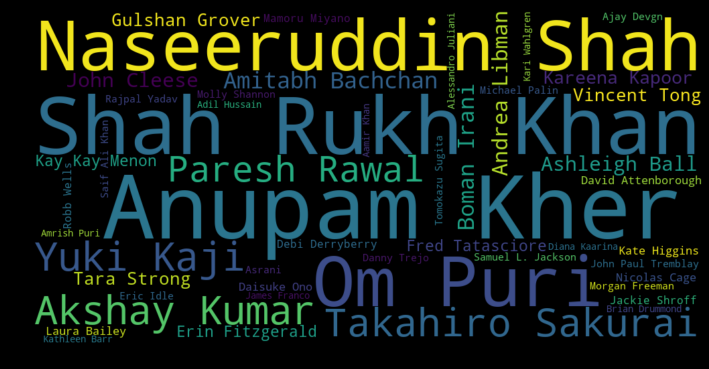

In [21]:
Movie_Cast = ", ".join(Movies[Movies['cast'].notna()]['cast']).split(", ")
Movie_Cast_list = Counter(Movie_Cast).most_common(50)
Movie_Cast_frequncy=dict(Movie_Cast_list)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate_from_frequencies(Movie_Cast_frequncy)

fig = plt.figure(
    figsize = (12, 12),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

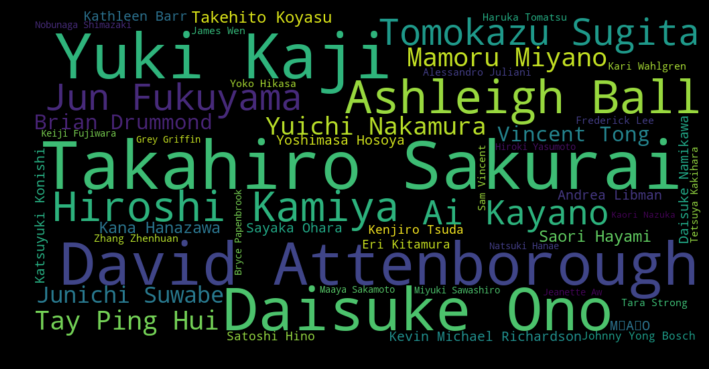

In [338]:
Shows_cast = ", ".join(TV_Shows[TV_Shows['cast'].notna()]['cast']).split(", ")
Shows_cast_list = Counter(Shows_cast).most_common(50)
Shows_cast_frequncy=dict(Shows_cast_list)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate_from_frequencies(Shows_cast_frequncy)

fig = plt.figure(
    figsize = (12, 12),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

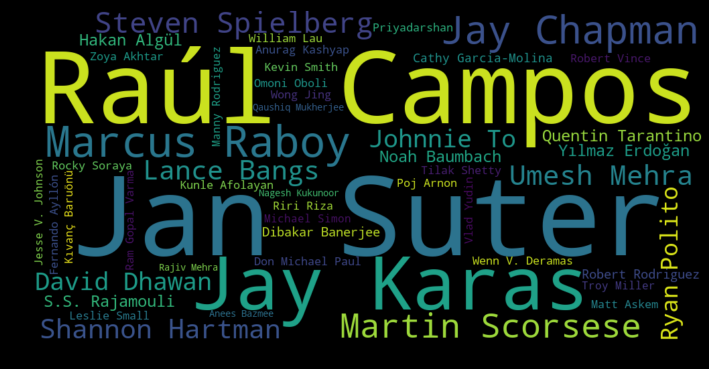

In [339]:
director = ", ".join(df[df['director'].notna()]['director']).split(", ")
director_list = Counter(director).most_common(50)
director_frequncy=dict(director_list)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate_from_frequencies(director_frequncy)

fig = plt.figure(
    figsize = (12, 12),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [315]:
TV_Shows=df[df['type']=='TV Show']
TV_Shows['duration']=TV_Shows['duration'].str.replace(" Seasons"," ")
TV_Shows['duration']=TV_Shows['duration'].str.replace(" Season"," ")
TV_Shows['duration']=TV_Shows['duration'].astype(int)

TV_Shows[['title','duration']].sort_values(by='duration', ascending=False)[:11].reset_index(drop=True).rename(columns={"duration":"Seasons"})

,title,Seasons
0,NCIS,15
1,Grey's Anatomy,15
2,Supernatural,14
3,COMEDIANS of the world,13
4,Red vs. Blue,13
5,Criminal Minds,12
6,Trailer Park Boys,12
7,Heartland,11
8,Cheers,11
9,Frasier,11


In [316]:
Movies=df[df['type']=='Movie']
Movies['duration']=Movies['duration'].str.replace(" min"," ")
Movies['duration']=Movies['duration'].astype(int)


Movies[['title','duration']].sort_values(by='duration', ascending=False)[:11].reset_index(drop=True).rename(columns={"duration":"duration(in minutes)"})

,title,duration(in minutes)
0,Black Mirror: Bandersnatch,312
1,Sangam,228
2,Lagaan,224
3,Jodhaa Akbar,214
4,The Irishman,209
5,The Gospel of Luke,205
6,What's Your Raashee?,203
7,The Lord of the Rings: The Return of the King,201
8,Doctor Zhivago,200
9,Elephants Dream 4 Hour,196


In [327]:
Movies[['title','duration']].sort_values(by='duration', ascending=True)[:20].reset_index(drop=True).rename(columns={"duration":"duration(in minutes)"})

,title,duration(in minutes)
0,Silent,3
1,American Factory: A Conversation with the Obamas,10
2,Calico Critters: A Town of Dreams,11
3,Cosmos Laundromat: First Cycle,12
4,Zion,12
5,The Road to El Camino: Behind the Scenes of El...,14
6,Buddy Thunderstruck: The Maybe Pile,14
7,ANIMA,15
8,The Battle of Midway,18
9,Michael Lost and Found,19


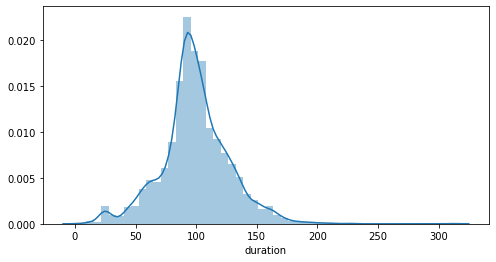

In [323]:
plt.figure(figsize=(8,4))
sns.distplot(Movies['duration'])

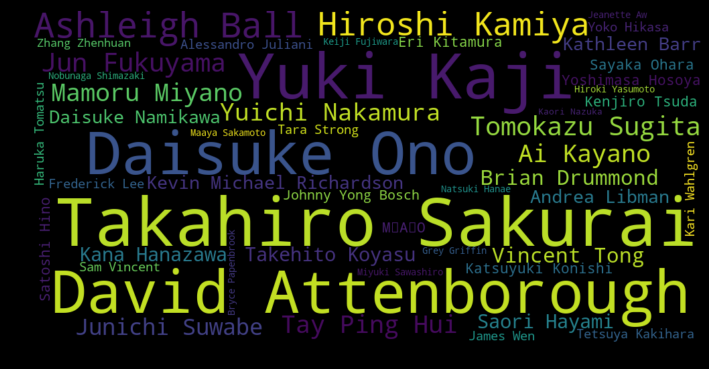

In [333]:
Shows_cast = ", ".join(TV_Shows[TV_Shows['cast'].notna()]['cast']).split(", ")
Shows_cast_list = Counter(Shows_cast).most_common(50)
Shows_cast_frequncy=dict(Shows_cast_list)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = STOPWORDS).generate_from_frequencies(Shows_cast_frequncy)

fig = plt.figure(
    figsize = (12, 12),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

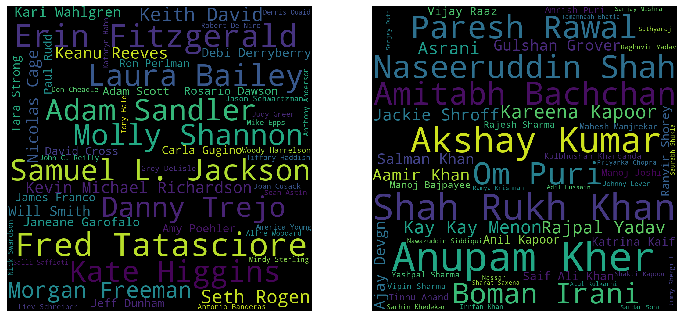

In [368]:
Country = list(df['country'].value_counts().index)[:6]
#['United States', 'India', 'United Kingdom', 'Japan', 'Canada', 'South Korea']
def country_trace(i):
    
    country=Country[i]
    TV_Shows=df[df['country']==country]
    Shows_cast = ", ".join(TV_Shows[TV_Shows['cast'].notna()]['cast']).split(", ")
    Shows_cast_list = Counter(Shows_cast).most_common(50)
    Shows_cast_frequncy=dict(Shows_cast_list)

    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    wordcloud = WordCloud(
        width = 1000,
        height = 1000,
        background_color = 'black',
        stopwords = STOPWORDS).generate_from_frequencies(Shows_cast_frequncy)
    
    return wordcloud

fig = plt.figure(figsize=(12,12))

for i in range(0,2):
    
    ax = fig.add_subplot(1,2,i+1)
    wordcloud = country_trace(i)

    ax.imshow(wordcloud)
    ax.axis('off')